In [1]:
# Made by Ahmed Raafat
# Sec 1
# BN 8

from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import scipy.optimize as SP
import math
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
'''
List of functions
'''
def linear(x,a,b):
    return a*x+b

def quad(x,a,b,c):
    return a*(x**2)+b*x+c

def cubic(x,a,b,c,d):
    return a*(x**3)+b*(x**2)+c*x+d

def log(x,a,b):
    return a*np.log(b+x)

def power(x,a,b):
    return a*(x**b)

def expo(x,a,b,c):
    return a*np.exp(b*x)+c

def log2(x,a,b):
    return a*np.log(x)+b  

In [3]:
#Question 1
'''
x: denotes to the years with offset
y: the labels
A: the real data
'''
x=np.array([1, 2, 3, 4, 5])
y=np.array([19.358, 19.484, 20.293, 21.499, 23.561])
A=np.array([1990,1991,1992,1993,1994])

x_train=x.reshape(-1, 1)
y_train=y.reshape(-1, 1)

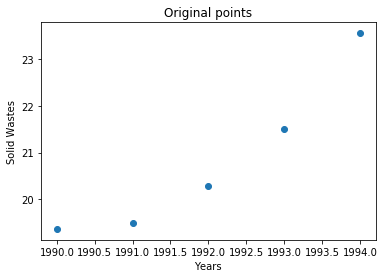

In [4]:
plt.scatter(A,y_train)

plt.xlabel("Years")
plt.ylabel("Solid Wastes")
plt.title('Original points')
plt.show()

C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


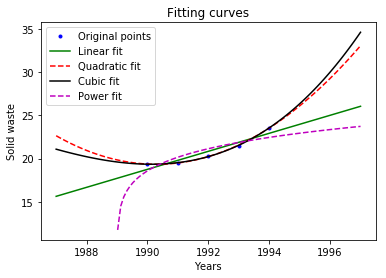

In [5]:
'''
xp        : Points to train on
xA        : Points to adjust the x-axis of the graph
Linear    : poly1d of Linear function
Quadratic : poly1d of Quadratic function
Cubic     : poly1d of Cubic function
coeff     : contains the best parameters for the power function (2 parameters)
'''
xp=np.linspace(-2, 8,100)
xA=np.linspace(1987,1997,100)

Linear=np.poly1d(SP.curve_fit(linear, x_train.ravel(), y_train.ravel())[0])  # Linear green
Quadratic=np.poly1d(SP.curve_fit(quad, x_train.ravel(), y_train.ravel())[0]) # Quadratic red
Cubic=np.poly1d(SP.curve_fit(cubic, x_train.ravel(), y_train.ravel())[0])    # Cubic black
coeff=SP.curve_fit(power, x_train.ravel(), y_train.ravel())[0]               # Power magenta


Power=power(xp,coeff[0],coeff[1])


plt.plot(A, y, 'b.',label='Original points')
plt.plot(xA, Linear(xp), 'g-',label='Linear fit') 
plt.plot(xA, Quadratic(xp), 'r--', label='Quadratic fit')
plt.plot(xA, Cubic(xp), 'k-', label='Cubic fit')
plt.plot(xA, Power, 'm--',label='Power fit')
         
plt.title('Fitting curves')
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Solid waste')
plt.show()

In [6]:
#Computing R squared
from sklearn import metrics
print("Linear fitting R squared = "+str(metrics.r2_score(y_train, Linear(x_train))))
print("Quadratic fitting R squared = "+str(metrics.r2_score(y_train, Quadratic(x_train))))
print("Cubic fitting R squared = "+str(metrics.r2_score(y_train, Cubic(x_train))))
print("Power fitting R squared = "+str(metrics.r2_score(y_train, power(x_train,coeff[0],coeff[1]))))

Linear fitting R squared = 0.892160674169
Quadratic fitting R squared = 0.999102737247
Cubic fitting R squared = 0.999348613446
Power fitting R squared = 0.741239990898


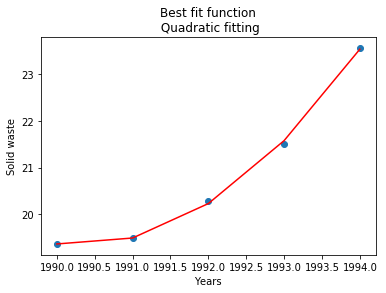

Quadratic gives best as it has lower polynomial and we have only 1 feature and


In [7]:
plt.scatter(A,y_train)
plt.plot(A,Quadratic(x_train), color='red')
plt.title('Best fit function\n Quadratic fitting')
plt.xlabel('Years')
plt.ylabel('Solid waste')
plt.show()
print('Quadratic gives best as it has lower polynomial and we have only 1 feature and')

In [8]:
'''
x_test    : contains the training data and test data with offset
B         : contains the real training data and real test data
y_predict : predictions on the training and test data using Qudaratic fitting
'''
x_test=[1,2,3,4,5,11,12,13,14,15,16]
B=[1990,1991,1992,1993,1994,2000,2001,2002,2003,2004,2005]

y_predict_linear=Linear(x_test)
y_predict_quadratic=Quadratic(x_test)
y_predict_cubic=Cubic(x_test)
y_predict_power=power(x_test,coeff[0],coeff[1])

print("Prediction values with Linear regression (2000 - 2005) = "+str(np.around(y_predict_linear.ravel()[5:],3)))
print("Prediction values with Quadratic regression (2000 - 2005) = "+str(np.around(y_predict_quadratic.ravel()[5:],3)))
print("Prediction values with Cubic regression (2000 - 2005) = "+str(np.around(y_predict_cubic.ravel()[5:],3)))
print("Prediction values with Power regression (2000 - 2005) = "+str(np.around(y_predict_power.ravel()[5:],3)))

Prediction values with Linear regression (2000 - 2005) = [ 29.176  30.218  31.26   32.302  33.344  34.386]
Prediction values with Quadratic regression (2000 - 2005) = [ 48.081  54.307  61.143  68.589  76.644  85.309]
Prediction values with Cubic regression (2000 - 2005) = [  55.071   64.376   75.069   87.238  100.968  116.346]
Prediction values with Power regression (2000 - 2005) = [ 24.629  24.883  25.118  25.338  25.544  25.739]


In [9]:
#Question 2
'''
Year : training data with offset
A    : Real training data
Y    : Real labels
'''
Year=np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
A   =np.array([1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996])
Y   =np.array([13.70, 13.12, 12.71, 12.34, 11.92, 11.46, 10.96, 10.45, 9.94, 9.53])

x_train=Year.reshape(-1, 1)
y_train=Y.reshape(-1, 1)

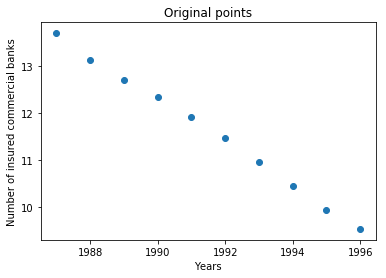

In [10]:
plt.scatter(A,y_train)

plt.xlabel("Years")
plt.ylabel("Number of insured commercial banks")
plt.title('Original points')
plt.show()

C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


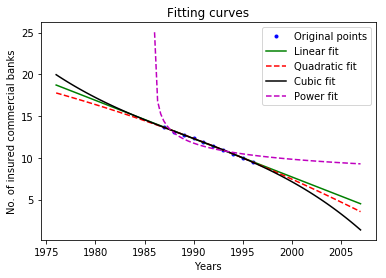

In [11]:
'''
xp        : Points to train on
xA        : Points to adjust the x-axis of the graph
Linear    : poly1d of Linear function
Quadratic : poly1d of Quadratic function
Cubic     : poly1d of Cubic function
coeff     : contains the best parameters for the power function (2 parameters)
'''
xp=np.linspace(-10, 21,100)
xA=np.linspace(1976,2007,100)

Linear=np.poly1d(SP.curve_fit(linear, x_train.ravel(), y_train.ravel())[0])  # Linear green
Quadratic=np.poly1d(SP.curve_fit(quad, x_train.ravel(), y_train.ravel())[0]) # Quadratic red
Cubic=np.poly1d(SP.curve_fit(cubic, x_train.ravel(), y_train.ravel())[0])    # Cubic black
coeff=SP.curve_fit(power, x_train.ravel(), y_train.ravel())[0]               # Power magenta


Power=power(xp,coeff[0],coeff[1])


plt.plot(A, Y, 'b.',label='Original points')
plt.plot(xA, Linear(xp), 'g-',label='Linear fit') 
plt.plot(xA, Quadratic(xp), 'r--', label='Quadratic fit')
plt.plot(xA, Cubic(xp), 'k-', label='Cubic fit')
plt.plot(xA, Power, 'm--',label='Power fit')
         
plt.title('Fitting curves')
plt.legend(loc='upper right')
plt.xlabel('Years')
plt.ylabel('No. of insured commercial banks')
plt.show()

In [12]:
from sklearn import metrics
print("Linear fitting R squared = "+str(metrics.r2_score(y_train, Linear(x_train))))
print("Quadratic fitting R squared = "+str(metrics.r2_score(y_train, Quadratic(x_train))))
print("Cubic fitting R squared = "+str(metrics.r2_score(y_train, Cubic(x_train))))
print("Power fitting R squared = "+str(metrics.r2_score(y_train, power(x_train,coeff[0],coeff[1]))))

Linear fitting R squared = 0.998132792217
Quadratic fitting R squared = 0.9986408333
Cubic fitting R squared = 0.998710311684
Power fitting R squared = 0.865835796443


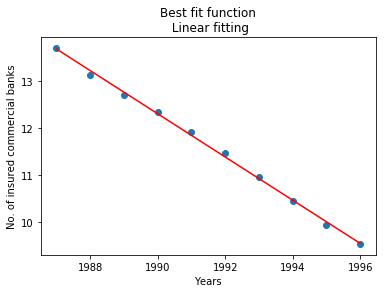

Linear gives more realistic predictions as it has lower polynomial and we have only 1 feature


In [13]:
plt.scatter(A,y_train)
plt.plot(A,Linear(x_train), color='red')
plt.title('Best fit function\n Linear fitting')
plt.xlabel('Years')
plt.ylabel('No. of insured commercial banks')
plt.show()
print('Linear gives more realistic predictions as it has lower polynomial and we have only 1 feature')

In [14]:
'''
x_test    : contains the test and training data with offset
B         : contains the real test and real training data
y_predict : contains the prediction of training and test data with Linear fitting
'''
x_test=[1,2,3,4,5,6,7,8,9,10,14,15,16,17,18,19]
B=[1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,2000,2001,2002,2003,2004,2005]
y_predict=Linear(x_test)

y_predict_linear=Linear(x_test)
y_predict_quadratic=Quadratic(x_test)
y_predict_cubic=Cubic(x_test)
y_predict_power=power(x_test,coeff[0],coeff[1])

print("Prediction values with Linear regression (2000 - 2005) = "+str(np.around(y_predict_linear.ravel()[11:],3)))
print("Prediction values with Quadratic regression (2000 - 2005) = "+str(np.around(y_predict_quadratic.ravel()[11:],3)))
print("Prediction values with Cubic regression (2000 - 2005) = "+str(np.around(y_predict_cubic.ravel()[11:],3)))
print("Prediction values with Power regression (2000 - 2005) = "+str(np.around(y_predict_power.ravel()[11:],3)))

Prediction values with Linear regression (2000 - 2005) = [ 7.255  6.796  6.338  5.879  5.42 ]
Prediction values with Quadratic regression (2000 - 2005) = [ 6.92   6.379  5.83   5.273  4.708]
Prediction values with Cubic regression (2000 - 2005) = [ 6.47   5.751  4.984  4.166  3.293]
Prediction values with Power regression (2000 - 2005) = [ 9.738  9.649  9.566  9.488  9.415]


In [15]:
Time=np.array([0, 0.1080, 0.2150, 0.3225, 0.4300, 0.5375, 0.6450, 0.7525, 0.8600])
Height= np.array([1.03754, 1.40205, 1.63806, 1.77412, 1.80392, 1.71522, 1.50942, 1.21410, 0.83173])
Velocity= Height/Time

x_train=Time.reshape(-1, 1)
y_train=Height.reshape(-1, 1)

xV_train=Time[1:].reshape(-1,1)
yV_train=[]
for i in range (Time.shape[0]-1):
    yV_train.append(np.abs(Height[i+1]-Height[i])/(Time[i+1]-Time[i]))
yV_train=np.array(yV_train).reshape(-1,1)

C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


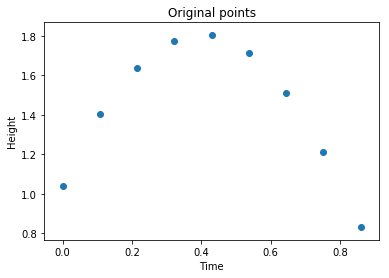

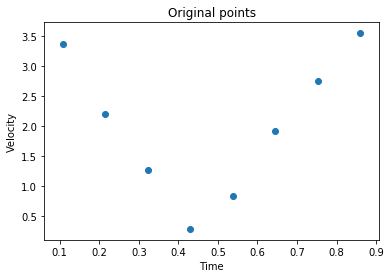

In [16]:
plt.scatter(x_train,y_train)

plt.xlabel("Time")
plt.ylabel("Height")
plt.title('Original points')
plt.show()

plt.scatter(xV_train,yV_train)

plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title('Original points')
plt.show()

C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in power


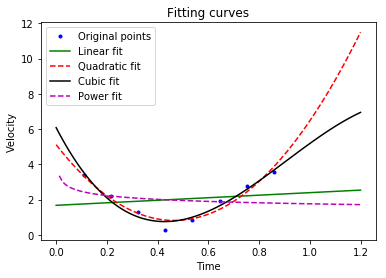

Linear fitting R squared = 0.0255606224343
Quadratic fitting R squared = 0.921575357124
Cubic fitting R squared = 0.944382516933
Power fitting R squared = 0.019704454159

Maximum height is at the lowest velocity [ 0.8384981] m/s is = [ 1.94999559] meters
Maximum vertical velocity is at the maximum point = [ 3.8925854] m/s


In [17]:
# using online graphing calculator i got this expression

xp=np.linspace(0, 1.2,100)

Linear=np.poly1d(SP.curve_fit(linear, xV_train.ravel(), yV_train.ravel())[0])  # Linear green
Quadratic=np.poly1d(SP.curve_fit(quad, xV_train.ravel(), yV_train.ravel())[0]) # Quadratic red
Cubic=np.poly1d(SP.curve_fit(cubic, xV_train.ravel(), yV_train.ravel())[0])    # Cubic black
coeff=SP.curve_fit(power, xV_train.ravel(), yV_train.ravel())[0]               # Power magenta


Power=power(xp,coeff[0],coeff[1])


plt.plot(xV_train, yV_train, 'b.',label='Original points')
plt.plot(xp, Linear(xp), 'g-',label='Linear fit') 
plt.plot(xp, Quadratic(xp), 'r--', label='Quadratic fit')
plt.plot(xp, Cubic(xp), 'k-', label='Cubic fit')
plt.plot(xp, Power, 'm--',label='Power fit')


plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title('Fitting curves')
plt.legend(loc='upper left')
plt.show()

print("Linear fitting R squared = "+str(metrics.r2_score(yV_train, Linear(xV_train))))
print("Quadratic fitting R squared = "+str(metrics.r2_score(yV_train, Quadratic(xV_train))))
print("Cubic fitting R squared = "+str(metrics.r2_score(yV_train, Cubic(xV_train))))
print("Power fitting R squared = "+str(metrics.r2_score(yV_train, power(xV_train,coeff[0],coeff[1]))))
print('')
print('Maximum height is at the lowest velocity '+str(min(Quadratic(xV_train)))+" m/s is = "+str(min(Quadratic(xV_train)/0.43))+" meters")
print('Maximum vertical velocity is at the maximum point = '+str(max(Quadratic(xV_train)))+" m/s")

C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in power
C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


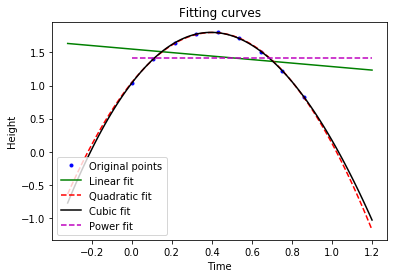

In [18]:
'''
xp        : Points to train on and used as x-axis
Linear    : poly1d of Linear function
Quadratic : poly1d of Quadratic function
Cubic     : poly1d of Cubic function
coeff     : contains the best parameters for the power function (2 parameters)
'''
xp=np.linspace(-0.32, 1.2,100)


Linear=np.poly1d(SP.curve_fit(linear, x_train.ravel(), y_train.ravel())[0])  # Linear green
Quadratic=np.poly1d(SP.curve_fit(quad, x_train.ravel(), y_train.ravel())[0]) # Quadratic red
Cubic=np.poly1d(SP.curve_fit(cubic, x_train.ravel(), y_train.ravel())[0])    # Cubic black
coeff=SP.curve_fit(power, x_train.ravel(), y_train.ravel())[0]               # Power magenta


Power=power(xp,coeff[0],coeff[1])


plt.plot(x_train, y_train, 'b.',label='Original points')
plt.plot(xp, Linear(xp), 'g-',label='Linear fit') 
plt.plot(xp, Quadratic(xp), 'r--', label='Quadratic fit')
plt.plot(xp, Cubic(xp), 'k-', label='Cubic fit')
plt.plot(xp, Power, 'm--',label='Power fit')
         
plt.title('Fitting curves')
plt.legend(loc='lower left')
plt.xlabel('Time')
plt.ylabel('Height')
plt.show()

In [19]:
print("Linear fitting R squared = "+str(metrics.r2_score(y_train, Linear(x_train))))
print("Quadratic fitting R squared = "+str(metrics.r2_score(y_train, Quadratic(x_train))))
print("Cubic fitting R squared = "+str(metrics.r2_score(y_train, Cubic(x_train))))
print("Power fitting R squared = "+str(metrics.r2_score(y_train, power(x_train,coeff[0],coeff[1]))))

Linear fitting R squared = 0.0510280854483
Quadratic fitting R squared = 0.999307305276
Cubic fitting R squared = 0.99972634731
Power fitting R squared = -0.998543677033


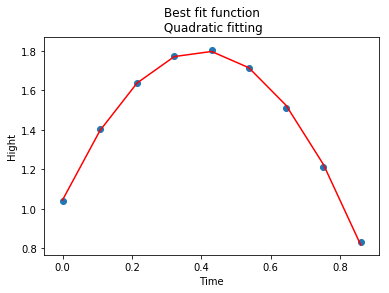

In [20]:
plt.scatter(x_train,y_train)
plt.plot(x_train,Quadratic(x_train), color='red')
plt.title('Best fit function\n Quadratic fitting')
plt.xlabel('Time')
plt.ylabel('Hight')
plt.show()

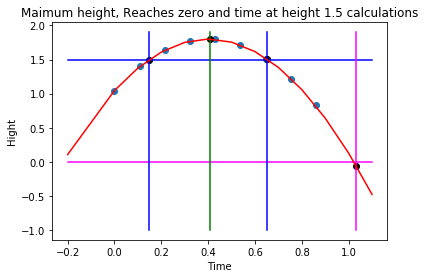

Maximum Height at = 1.79976310771 meters
Reaches zero   at = 1.03202 seconds
Time at height 1.5 meters = 0.1459 and 0.651 seconds Corresponding to 1.494 and 1.51 meters respectively


In [21]:
'''
x_test : training and test data
x_important_points : contains the 1.5 meter points, intersection point with 0 and maximum point

xx                 : line along x-axis to draw with
ya                 : line along y-axis to draw with

yy                 : a line intersects with 1.5  meters horizontally
xa1                : intersection point with 1.5 meters vertically
xa2                : intersection point with 1.5 meters vertically

xa3                : intersection with maximum point vertically

yz                 : a line intersects with zero meters horizontally
xa4                : intersection with zero meters vertically
'''
x_test=[-0.2,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1]
x_important_points=[0.1459,0.41,0.651,1.03202]
plt.scatter(x_train,y_train)
plt.scatter(x_important_points,Quadratic(x_important_points),color='black')

xx = np.linspace(-0.2,1.1,100)
yy = 1.5 + 0 * xx
plt.plot(xx, yy,'blue')

yz= 0+0*xx
plt.plot(xx,yz,'magenta')

ya= np.linspace(-1,1.9,100)
xa1= ya*0+0.1459
xa2= ya*0+0.651
xa3= ya*0+0.41
xa4= ya*0+1.03202
plt.plot(xa1,ya,'blue')
plt.plot(xa2,ya,'blue')
plt.plot(xa3,ya,'green')
plt.plot(xa4,ya,'magenta')

plt.plot(x_test,Quadratic(x_test), color='red')
plt.xlabel('Time')
plt.ylabel('Hight')
plt.title("Maimum height, Reaches zero and time at height 1.5 calculations")
plt.show()

print("Maximum Height at = "+ str(Quadratic(0.41))+" meters")
print("Reaches zero   at = "+str(1.03202) +" seconds")
print("Time at height 1.5 meters = " + str(0.1459) + " and "+str(0.651)+" seconds" " Corresponding to "+ str(np.around(Quadratic(0.1459),3)) + " and "+str(np.around(Quadratic(0.651),3))+ " meters respectively")

In [22]:
Year=np.array([1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860])
POP=np.array([3.93, 5.31, 7.24, 9.64, 12.86, 17.07, 23.19, 31.44])
A=np.array([1,2,3,4,5,6,7,8])

x_train=A.reshape(-1, 1)
y_train=POP.reshape(-1, 1)

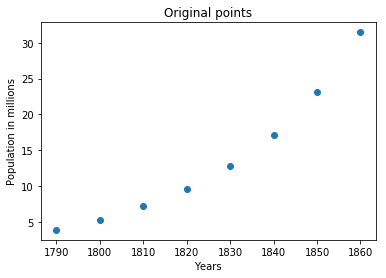

In [23]:
plt.scatter(Year,y_train)

plt.xlabel("Years")
plt.ylabel("Population in millions")
plt.title('Original points')
plt.show()

C:\Users\Eyad\Anacondas2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


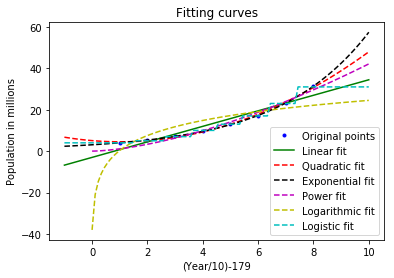

In [24]:
'''
xp            : x-axis line
coeffexpo     : best exponential parameters
coeffpow      : best power parameters
coefflog      : best logarithmic parameters
Logreg        : Logistic regression classifier with small reguralization
Logistic      : Contains the logistic regression predictions on the training data
'''

xp=np.linspace(-1, 10,100)

Logreg = LogisticRegression(C=100000)

Logreg.fit(A.reshape(-1,1),np.around(POP).reshape(-1,1))
Logistic = Logreg.predict(xp.reshape(-1,1))

Linear=np.poly1d(SP.curve_fit(linear, x_train.ravel(), y_train.ravel())[0])     # Linear green
Quadratic=np.poly1d(SP.curve_fit(quad, x_train.ravel(), y_train.ravel())[0])    # Quadratic red
coeffexpo=SP.curve_fit(expo, x_train.ravel(), y_train.ravel())[0]               # Exponential black
coeffpow=SP.curve_fit(power, x_train.ravel(), y_train.ravel())[0]               # Power magenta
coefflog=SP.curve_fit(log,x_train.ravel(), y_train.ravel())[0]                  # logarithmic yellow
  
Exponential=expo(xp,coeffexpo[0],coeffexpo[1],coeffexpo[2])
Power=power(xp,coeffpow[0],coeffpow[1])
Logarithmic=log(xp,coefflog[0],coefflog[1])

plt.plot(x_train, y_train, 'b.',label='Original points')
plt.plot(xp, Linear(xp), 'g-',label='Linear fit') 
plt.plot(xp, Quadratic(xp), 'r--', label='Quadratic fit')
plt.plot(xp, Exponential, 'k--',label='Exponential fit')
plt.plot(xp, Power, 'm--',label='Power fit')
plt.plot(xp, Logarithmic, 'y--',label='Logarithmic fit')
plt.plot(xp, Logistic, 'c--',label='Logistic fit')
      
plt.title('Fitting curves')
plt.legend(loc='lower right')
plt.xlabel('(Year/10)-179')
plt.ylabel('Population in millions')
plt.show()

In [25]:
print("Linear fitting R squared = "+str(metrics.r2_score(y_train, Linear(x_train))))
print("Quadratic fitting R squared = "+str(metrics.r2_score(y_train, Quadratic(x_train))))
print("Exponential fitting R squared = "+str(metrics.r2_score(y_train, expo(x_train,coeffexpo[0],coeffexpo[1],coeffexpo[2]))))
print("Power fitting R squared = "+str(metrics.r2_score(y_train, power(x_train,coeffpow[0],coeffpow[1]))))
print("Logarithmic fitting R squared = "+str(metrics.r2_score(y_train, log(x_train,coefflog[0],coefflog[1]))))
print("Logistic fitting R squared = "+str(metrics.r2_score(y_train, Logreg.predict(x_train))))

Linear fitting R squared = 0.919907260278
Quadratic fitting R squared = 0.996262209549
Exponential fitting R squared = 0.999887062341
Power fitting R squared = 0.966618149964
Logarithmic fitting R squared = 0.718153036256
Logistic fitting R squared = 0.999153484867


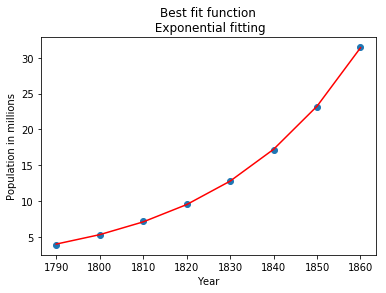

Exponential gives more realistic predictions as it has almost perfect R squared


In [26]:
plt.scatter(Year,y_train)
plt.plot(Year,expo(x_train,coeffexpo[0],coeffexpo[1],coeffexpo[2]), color='red')
plt.title('Best fit function\n Exponential fitting')
plt.xlabel('Year')
plt.ylabel('Population in millions')
plt.show()
print('Exponential gives more realistic predictions as it has almost perfect R squared')

In [27]:
print("Prediction of the population in 1870 = "+str(expo(9,coeffexpo[0],coeffexpo[1],coeffexpo[2]))+ " Millions   not correct due to civil wars")
print("Prediction of the population in 1930 = "+str(expo(14,coeffexpo[0],coeffexpo[1],coeffexpo[2]))+ " Millions   not correct due to civil wars")
print("")
print("This prediction might not be viable due to civil wars that reduced the population where about over 1 million died")
      

Prediction of the population in 1870 = 42.4194513209 Millions   not correct due to civil wars
Prediction of the population in 1930 = 193.000691409 Millions   not correct due to civil wars

This prediction might not be viable due to civil wars that reduced the population where about over 1 million died


In [28]:
#Question 4
Time=np.array([1,2,3,4,5,6])
Score=np.array([84.9, 84.6, 84.4 ,84.2, 84.1, 83.9])

x_train=Time.reshape(-1, 1)
y_train=Score.reshape(-1, 1)

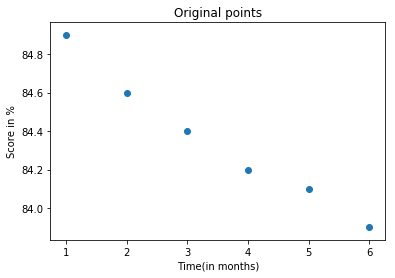

In [29]:
plt.scatter(x_train,y_train)

plt.xlabel("Time(in months)")
plt.ylabel("Score in %")
plt.title('Original points')
plt.show()

C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power
C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


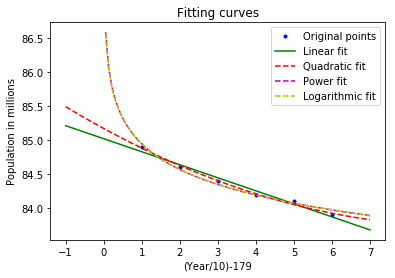

In [30]:
xp=np.linspace(-1, 7,100)


Linear=np.poly1d(SP.curve_fit(linear, x_train.ravel(), y_train.ravel())[0])     # Linear green
Quadratic=np.poly1d(SP.curve_fit(quad, x_train.ravel(), y_train.ravel())[0])    # Quadratic red
coeffpow=SP.curve_fit(power, x_train.ravel(), y_train.ravel())[0]               # Power magenta
coefflog=SP.curve_fit(log2,x_train.ravel(), y_train.ravel())[0]                 # logarithmic yellow


Power=power(xp,coeffpow[0],coeffpow[1])
Logarithmic=log2(xp,coefflog[0],coefflog[1])


plt.plot(x_train, y_train, 'b.',label='Original points')
plt.plot(xp, Linear(xp), 'g-',label='Linear fit') 
plt.plot(xp, Quadratic(xp), 'r--', label='Quadratic fit')
plt.plot(xp, Power, 'm--',label='Power fit')
plt.plot(xp, Logarithmic, 'y--',label='Logarithmic fit')

         
plt.title('Fitting curves')
plt.legend(loc='upper right')
plt.xlabel('(Year/10)-179')
plt.ylabel('Population in millions')
plt.show()

In [31]:
from sklearn import metrics
print("Linear fitting R squared = "+str(metrics.r2_score(y_train, Linear(x_train))))
print("Quadratic fitting R squared = "+str(metrics.r2_score(y_train, Quadratic(x_train))))
print("Power fitting R squared = "+str(metrics.r2_score(y_train, power(x_train,coeffpow[0],coeffpow[1]))))
print("Logarithmic fitting R squared = "+str(metrics.r2_score(y_train, log2(x_train,coefflog[0],coefflog[1]))))

Linear fitting R squared = 0.979062159215
Quadratic fitting R squared = 0.993784078517
Power fitting R squared = 0.981660332464
Logarithmic fitting R squared = 0.982059980451


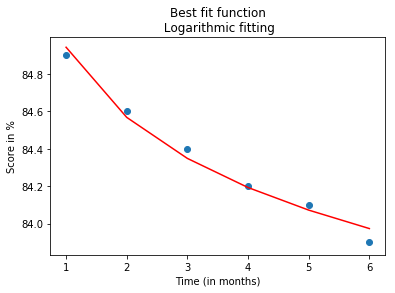

Logarithmic gives more realistic predictions than Quadratic because its only 1 feature


In [32]:
plt.scatter(x_train,y_train)
plt.plot(x_train,log2(x_train,coefflog[0],coefflog[1]), color='red')
plt.title('Best fit function\n Logarithmic fitting')
plt.xlabel('Time (in months)')
plt.ylabel('Score in %')
plt.show()
print('Logarithmic gives more realistic predictions than Quadratic because its only 1 feature')

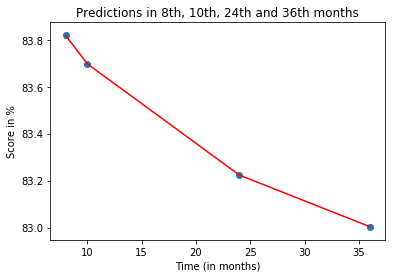

Prediction of the 8th month  = 83.8179727248
Prediction of the 10th month = 83.697188825
Prediction of the 24th month = 83.2233121317
Prediction of the 36th month = 83.0038406


In [33]:
test=[8,10,24,36]
plt.scatter(test,log2(test,coefflog[0],coefflog[1]))
plt.plot(test,log2(test,coefflog[0],coefflog[1]),'red')
plt.title('Predictions in 8th, 10th, 24th and 36th months')
plt.xlabel('Time (in months)')
plt.ylabel('Score in %')
plt.show()

print("Prediction of the "+str(8)+"th month  = "+ str(log2(8,coefflog[0],coefflog[1])))
print("Prediction of the "+str(10)+"th month = "+ str(log2(10,coefflog[0],coefflog[1])))
print("Prediction of the "+str(24)+"th month = "+ str(log2(24,coefflog[0],coefflog[1])))
print("Prediction of the "+str(36)+"th month = "+ str(log2(36,coefflog[0],coefflog[1])))

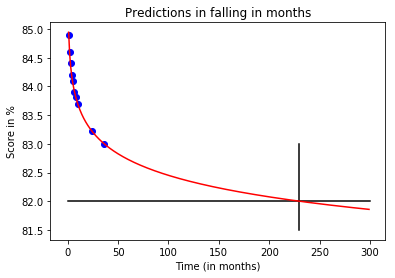

Test score falls below 82% after the month = 230


In [34]:
Fall=np.arange(1,300,1)
Pred=log2(Fall,coefflog[0],coefflog[1])

yyy=np.linspace(81.5,83,100)
yyy1=np.linspace(0,300,100)
xxx=yyy*0+230
xxx1=yyy1*0+82
plt.plot(xxx,yyy,'black')
plt.plot(yyy1,xxx1,'black')

plt.scatter(x_train,y_train,color='blue')
plt.scatter(test,log2(test,coefflog[0],coefflog[1]),color='blue')
plt.plot(Fall,Pred,'red')
plt.title('Predictions in falling in months')
plt.xlabel('Time (in months)')
plt.ylabel('Score in %')
plt.show()

print("Test score falls below 82% after the month = "+ str(230))

In [35]:
#Question 6
Year=np.arange(1870,2010,10)
POP=np.array([38.56, 50.19, 62.98, 76.21, 92.23, 106.02, 123.2, 132.16, 151.33, 179.32, 202.3, 226.54, 248.72, 281.42])
A=np.arange(1,15,1)

x_train=A.reshape(-1, 1)
y_train=POP.reshape(-1, 1)

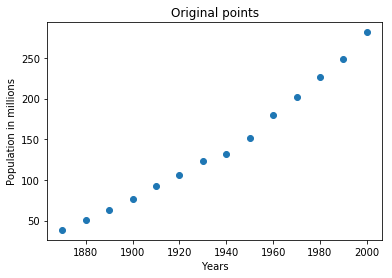

In [36]:
plt.scatter(Year,y_train)

plt.xlabel("Years")
plt.ylabel("Population in millions")
plt.title('Original points')
plt.show()

C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


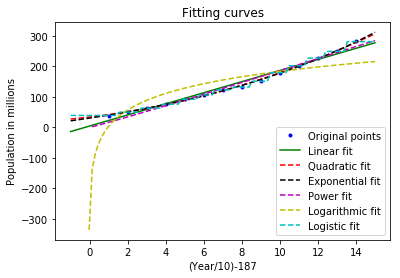

In [37]:
xp=np.linspace(-1, 15,100)


Logreg = LogisticRegression(C=1000000)

Logreg.fit(A.reshape(-1,1),np.around(POP).reshape(-1,1))
Logistic = Logreg.predict(xp.reshape(-1,1))

Linear=np.poly1d(SP.curve_fit(linear, x_train.ravel(), y_train.ravel())[0])     # Linear green
Quadratic=np.poly1d(SP.curve_fit(quad, x_train.ravel(), y_train.ravel())[0])    # Quadratic red
coeffexpo=SP.curve_fit(expo, x_train.ravel(), y_train.ravel())[0]               # Exponential black
coeffpow=SP.curve_fit(power, x_train.ravel(), y_train.ravel())[0]               # Power magenta
coefflog=SP.curve_fit(log,x_train.ravel(), y_train.ravel())[0]                  # logarithmic yellow
  

Exponential=expo(xp,coeffexpo[0],coeffexpo[1],coeffexpo[2])
Power=power(xp,coeffpow[0],coeffpow[1])
Logarithmic=log(xp,coefflog[0],coefflog[1])


plt.plot(x_train, y_train, 'b.',label='Original points')
plt.plot(xp, Linear(xp), 'g-',label='Linear fit') 
plt.plot(xp, Quadratic(xp), 'r--', label='Quadratic fit')
plt.plot(xp, Exponential, 'k--',label='Exponential fit')
plt.plot(xp, Power, 'm--',label='Power fit')
plt.plot(xp, Logarithmic, 'y--',label='Logarithmic fit')
plt.plot(xp, Logistic, 'c--',label='Logistic fit')

         
plt.title('Fitting curves')
plt.legend(loc='lower right')
plt.xlabel('(Year/10)-187')
plt.ylabel('Population in millions')
plt.show()

In [38]:
from sklearn import metrics
print("Linear fitting R squared = "+str(metrics.r2_score(y_train, Linear(x_train))))
print("Quadratic fitting R squared = "+str(metrics.r2_score(y_train, Quadratic(x_train))))
print("Exponential fitting R squared = "+str(metrics.r2_score(y_train, expo(x_train,coeffexpo[0],coeffexpo[1],coeffexpo[2]))))
print("Power fitting R squared = "+str(metrics.r2_score(y_train, power(x_train,coeffpow[0],coeffpow[1]))))
print("Logarithmic fitting R squared = "+str(metrics.r2_score(y_train, log(x_train,coefflog[0],coefflog[1]))))
print("Logistic fitting R squared = "+str(metrics.r2_score(y_train, Logreg.predict(x_train))))

Linear fitting R squared = 0.977574592004
Quadratic fitting R squared = 0.998078985969
Exponential fitting R squared = 0.998581220268
Power fitting R squared = 0.9778185197
Logarithmic fitting R squared = 0.784358885453
Logistic fitting R squared = 0.999984923323


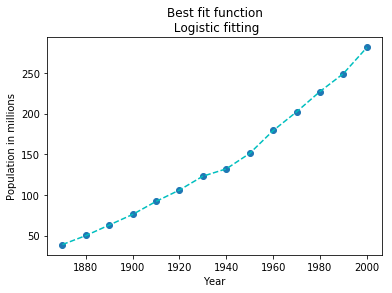

Logistic fitting gives more realistic predictions as it has almost perfect R squared


In [39]:
plt.scatter(Year,y_train)
plt.plot(Year,Logreg.predict(A.reshape(-1,1)),'c--')
plt.title('Best fit function\n Logistic fitting')
plt.xlabel('Year')
plt.ylabel('Population in millions')
plt.show()
print('Logistic fitting gives more realistic predictions as it has almost perfect R squared')

In [40]:
print("Prediction of the population in 1975 = "+str(Logreg.predict(11.5))+ " Millions  almost correct --->  Real life value = 216 Millions")
print("Prediction of the population in 2010 = "+str(Logreg.predict(24))+ " Millions  almost correct --->  Real life value = 309.3 Millions")
print("")
print("The predictions this time using logistic regression gives more sense but its not the same as in real life due to better living and better health conditions")
      

Prediction of the population in 1975 = [ 227.] Millions  almost correct --->  Real life value = 216 Millions
Prediction of the population in 2010 = [ 281.] Millions  almost correct --->  Real life value = 309.3 Millions

The predictions this time using logistic regression gives more sense but its not the same as in real life due to better living and better health conditions


In [41]:
#Question 7
ads=np.arange(0,100,10)
Bought=np.array([0.2, 0.7, 2.7, 9.2, 27, 57.6, 83.3, 94.8, 98.5, 99.6])
A=np.arange(1,11,1)

x_train=A.reshape(-1, 1)
y_train=Bought.reshape(-1, 1)

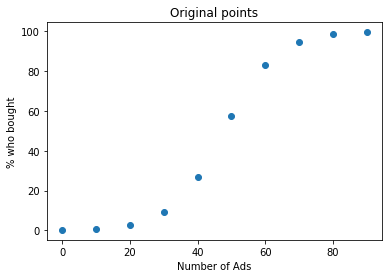

In [42]:
plt.scatter(ads,y_train)

plt.xlabel("Number of Ads")
plt.ylabel("% who bought")
plt.title('Original points')
plt.show()

C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
C:\Users\Eyad\Anacondas2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


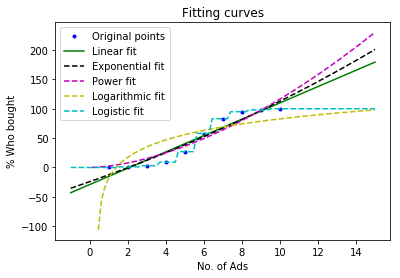

In [43]:
xp=np.linspace(-1, 15,100)

Logreg = LogisticRegression(C=1000000)

Logreg.fit(x_train,np.around(y_train))
Logistic = Logreg.predict(xp.reshape(-1,1))

Linear=np.poly1d(SP.curve_fit(linear, x_train.ravel(), y_train.ravel())[0])     # Linear green
coeffexpo=SP.curve_fit(expo, x_train.ravel(), y_train.ravel())[0]               # Exponential black
coeffpow=SP.curve_fit(power, x_train.ravel(), y_train.ravel())[0]               # Power magenta
coefflog=SP.curve_fit(log,x_train.ravel(), y_train.ravel())[0]                  # logarithmic yellow


Exponential=expo(xp,coeffexpo[0],coeffexpo[1],coeffexpo[2])
Power=power(xp,coeffpow[0],coeffpow[1])
Logarithmic=log(xp,coefflog[0],coefflog[1])



plt.plot(x_train, y_train, 'b.',label='Original points')
plt.plot(xp, Linear(xp), 'g-',label='Linear fit') 
plt.plot(xp, Exponential, 'k--',label='Exponential fit')
plt.plot(xp, Power, 'm--',label='Power fit')
plt.plot(xp, Logarithmic, 'y--',label='Logarithmic fit')
plt.plot(xp, Logistic, 'c--',label='Logistic fit')
         
plt.title('Fitting curves')
plt.legend(loc='upper left')
plt.xlabel('No. of Ads')
plt.ylabel('% Who bought')
plt.show()

In [44]:
from sklearn import metrics
print("Linear fitting R squared = "+str(metrics.r2_score(y_train, Linear(x_train))))
print("Exponential fitting R squared = "+str(metrics.r2_score(y_train, expo(x_train,coeffexpo[0],coeffexpo[1],coeffexpo[2]))))
print("Power fitting R squared = "+str(metrics.r2_score(y_train, power(x_train,coeffpow[0],coeffpow[1]))))
print("Logarithmic fitting R squared = "+str(metrics.r2_score(y_train, log(x_train,coefflog[0],coefflog[1]))))
print("Logistic fitting R squared = "+str(metrics.r2_score(y_train, Logreg.predict(x_train))))

Linear fitting R squared = 0.922902014673
Exponential fitting R squared = 0.925206290832
Power fitting R squared = 0.913231962473
Logarithmic fitting R squared = 0.695702604611
Logistic fitting R squared = 0.999944373185


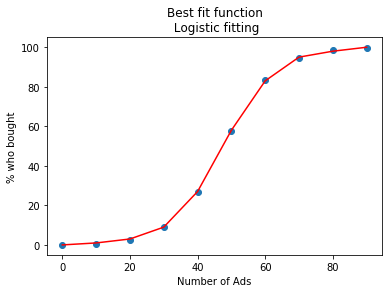

Logistic regression gives realistic prediction


In [45]:
plt.scatter(ads,y_train)
plt.plot(ads,Logreg.predict(x_train), color='red')
plt.title('Best fit function\n Logistic fitting')
plt.xlabel('Number of Ads')
plt.ylabel('% who bought')
plt.show()
print('Logistic regression gives realistic prediction')

In [46]:
print("Prediction of 100 ads = "+str(Logreg.predict(10))+"% who bought using Logistic fitting which is realistic")
print(" ")
print("The company can either advertise on internet or in crowded streets to change the pattern")

Prediction of 100 ads = [ 100.]% who bought using Logistic fitting which is realistic
 
The company can either advertise on internet or in crowded streets to change the pattern


In [47]:
#Question 8
import pandas as pd
File=pd.read_csv("../input/Question_8_Data.csv")
print("The data has size of = "+str(File.shape))
File.head()

IOError: File ../input/Question_8_Data.csv does not exist

In [48]:
#Taking 70% of the data as training data
x_train=File.iloc[0:22,0:3]
y_train=File.iloc[0:22,3]

x_test=File.iloc[22:,0:3]
y_test=File.iloc[22:,3]

Secondary_train=x_train['General Secondary Certificate grade?']
CommFirst_train=x_train['Communication first year grade?']
CommSecond_train=x_train['Communication second year grade?']
CommThird_train=y_train

Secondary_test=x_test['General Secondary Certificate grade?']
CommFirst_test=x_test['Communication first year grade?']
CommSecond_test=x_test['Communication second year grade?']
CommThird_test=y_test

NameError: name 'File' is not defined

In [49]:
plt.scatter(CommFirst_train,CommThird_train,color='magenta',label='1st year')
plt.scatter(CommSecond_train,CommThird_train,color='blue',label='2nd year')
plt.scatter(Secondary_train,CommThird_train,color='green',label='Secondary')

plt.xlabel("Scores in previous years")
plt.ylabel("3rd year Score")
plt.title("Practical Problem")
plt.legend(loc="lower right")
plt.show()

NameError: name 'CommFirst_train' is not defined

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

Logreg = LogisticRegression(C=10000000)
Logreg.fit(x_train, y_train)
Logistic = Logreg.predict(x_train)

knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
Kneighbors=knn.predict(x_train)

LinReg = LinearRegression()
LinReg.fit(x_train, y_train)
Linear= LinReg.predict(x_train)

ValueError: Unknown label type: 'continuous'

In [51]:
print("Linear fitting R squared = "+str(metrics.r2_score(y_train, Linear)))
print("Logistic fitting R squared = "+str(metrics.r2_score(y_train, Logistic)))
print("KNeighbors fitting R squared = "+str(metrics.r2_score(y_train, Kneighbors)))

ValueError: Found input variables with inconsistent numbers of samples: [10, 1]

In [52]:
print("Test R squared for Linear = "+str(metrics.r2_score(y_test, LinReg.predict(x_test))))
print("Test R squared for Logistic = "+str(metrics.r2_score(y_test, Logreg.predict(x_test))))
print("Test R squared for knn = "+str(metrics.r2_score(y_test, knn.predict(x_test))))

NameError: name 'y_test' is not defined

In [53]:
print("Actual test data is: ")
print(str(y_test))
print("")
print("Linear predictions respectively: ")
print(str(LinReg.predict(x_test).reshape(-1,1)))

Actual test data is: 


NameError: name 'y_test' is not defined

In [54]:
Std_Predictions=np.std(LinReg.predict(x_test))/x_test.shape[0]
Std_y_test=np.std(y_test)/x_test.shape[0]

Std_Predictions_error=Std_Predictions/np.sqrt(x_test.shape[0])
Std_y_test_error=Std_y_test/np.sqrt(x_test.shape[0])

print('Standard deviation of test data = '+str(Std_y_test))
print('Standard deviation of Predictions = '+str(Std_Predictions))
print('')
print('Standard Error of test data = '+str(Std_y_test_error))
print('Standard Error of Predictions = '+str(Std_Predictions_error))
print('')
print('This means they both have the same distribution and proves its accuracy')
print('')
print('Made by:  Ahmed Raafat Abdel-Wahab')
print('Section: 1')
print('Bn:      8')

NameError: name 'LinReg' is not defined

In [55]:
# Made by Ahmed Raafat
# Sec 1
# BN 8